# Covid 19 Analysis - Mini Project

### Section 1 - Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [2]:
corona_dataset_csv = pd.read_csv('time_series_covid_19_Confirmed.csv')
corona_dataset_csv.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,92,92,92,92,92,92,92,92,92,92
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,206743,213535,220682,228195,235677,241811,246499,253868,260911,268574
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,39102,39298,39586,39819,39985,40185,40410,40433,40593,40794
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,3809,3820,3832,3842,3851,3861,3875,3897,3915,3927


In [3]:
corona_dataset_csv.shape

(266, 208)

### Section 1 - Dropping the Lat & Long columns

In [4]:
corona_dataset_csv.drop(['Lat','Long'],axis=1,inplace=True)

In [5]:
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,NaN,Albania,0,0,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
4,NaN,Angola,0,0,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762


In [6]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

In [7]:
corona_dataset_aggregated.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
Albania,0,0,0,0,0,0,0,0,0,0,...,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
Algeria,0,0,0,0,0,0,0,0,0,0,...,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
Andorra,0,0,0,0,0,0,0,0,0,0,...,937,939,939,944,955,955,955,963,963,977
Angola,0,0,0,0,0,0,0,0,0,0,...,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,92,92,92,92,92,92,92,92,92,92
Argentina,0,0,0,0,0,0,0,0,0,0,...,206743,213535,220682,228195,235677,241811,246499,253868,260911,268574
Armenia,0,0,0,0,0,0,0,0,0,0,...,39102,39298,39586,39819,39985,40185,40410,40433,40593,40794
Australia,0,0,0,0,4,5,5,6,9,9,...,18730,19445,19890,20272,20698,21084,21397,21713,22127,22358


### Section 1 - Task - Visualize the data for India, China & US countries

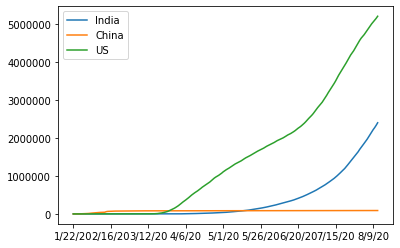

In [8]:
corona_dataset_aggregated.loc['India'].plot()
corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['US'].plot()
plt.legend()

### Section 2 - Finding a Good Measure

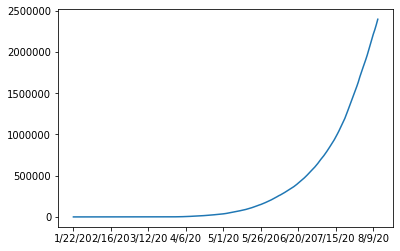

In [9]:
corona_dataset_aggregated.loc['India'].plot()

### Section 2 - Calculating the First Derivative

Text(0.5, 1.0, 'Infection_Rate')

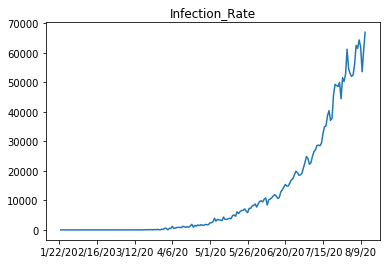

In [10]:
corona_dataset_aggregated.loc['India'].diff().plot()
plt.title('Infection_Rate')

### Section 2 - Task 1 - Calculating maximum infection rate

In [11]:
corona_dataset_aggregated.loc['India'].diff().max()

66999.0

In [12]:
corona_dataset_aggregated.loc['China'].diff().max()

15136.0

In [13]:
corona_dataset_aggregated.loc['US'].diff().max()

77255.0

In [14]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for country in countries :
    max_infection_rates.append(corona_dataset_aggregated.loc[country].diff().max())
corona_dataset_aggregated['max infection rate'] = max_infection_rates

In [15]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,max infection rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36782,36829,36896,37015,37054,37054,37162,37269,37345,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,5750,5889,6016,6151,6275,6411,6536,6676,6817,141.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,32504,33055,33626,34155,34693,35160,35712,36204,36699,675.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,939,939,944,955,955,955,963,963,977,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,1344,1395,1483,1538,1572,1672,1679,1735,1762,100.0


### Section 2 - Task 2 - Creating a new dataframe

In [16]:
corona_data = pd.DataFrame(corona_dataset_aggregated['max infection rate'])

In [17]:
corona_data.head()

,max infection rate
Country/Region,
Afghanistan,915.0
Albania,141.0
Algeria,675.0
Andorra,79.0
Angola,100.0


### Section 3 - Importing World Happiness Report

In [18]:
world_happiness_report = pd.read_csv("worldwide_happiness_report.csv")
world_happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [19]:
world_happiness_report.shape

(156, 9)

### Section 3 - Dropping the Columns

In [20]:
world_happiness_report.drop(['Overall rank','Score','Generosity','Perceptions of corruption'],axis=1 , inplace=True)

In [21]:
world_happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Section 3 - Setting Country as Index

In [22]:
world_happiness_report.set_index(['Country or region'],inplace=True)
world_happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### Section 3 - Task - Merging the two Data sets

In [23]:
data = corona_data.join(world_happiness_report,how="inner")
data.head()

,max infection rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,141.0,0.947,0.848,0.874,0.383
Algeria,675.0,1.002,1.160,0.785,0.086
Argentina,7663.0,1.092,1.432,0.881,0.471
Armenia,771.0,0.850,1.055,0.815,0.283


### Section 4 - Creating a new Data frame - Data2

In [24]:
corona_dataset2_csv = pd.read_csv('time_series_covid_19_Confirmed.csv')

In [25]:
corona_dataset_aggregated2 = corona_dataset2_csv.groupby("Country/Region").sum()

In [26]:
countries = list(corona_dataset_aggregated2.index)
max_infection_rates = []
for country in countries :
    max_infection_rates.append(corona_dataset_aggregated2.loc[country].diff().max())
corona_dataset_aggregated2['max infection rate'] = max_infection_rates

In [27]:
corona_data2 = pd.DataFrame(corona_dataset_aggregated2,columns = ['Lat','Long'])

In [28]:
corona_data2.head()

,Lat,Long
Country/Region,,
Afghanistan,33.93911,67.709953
Albania,41.15330,20.168300
Algeria,28.03390,1.659600
Andorra,42.50630,1.521800
Angola,-11.20270,17.873900


In [29]:
data2 = data.join(corona_data2,how = "inner")

In [30]:
data2.head()

,max infection rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Lat,Long
Afghanistan,915.0,0.350,0.517,0.361,0.000,33.93911,67.709953
Albania,141.0,0.947,0.848,0.874,0.383,41.15330,20.168300
Algeria,675.0,1.002,1.160,0.785,0.086,28.03390,1.659600
Argentina,7663.0,1.092,1.432,0.881,0.471,-38.41610,-63.616700
Armenia,771.0,0.850,1.055,0.815,0.283,40.06910,45.038200


In [31]:
world_map = folium.Map(location=[23, 80], zoom_start=4)
# display world map
world_map

### Section 4 - Task 1 - Visualizing Data2 using Folium Map

In [32]:
for i in range(0,len(data2)):
    folium.Circle(
        location=[data2.iloc[i]['Lat'],data2.iloc[i]['Long']],
        tooltip = "<h5>"+data2.iloc[i].name+"</h5>"+
        "<li>max infection rate"+str(data2.iloc[i]['max infection rate'])+"</li>"+
        "<li>Healthy life expectancy"+str(data2.iloc[i]['Healthy life expectancy'])+"</li>",
        
        radius = int((data2.iloc[i]['max infection rate'])*5.0),
    ).add_to(world_map)
world_map

### Section 5 - Visualization of the results

In [33]:
data2.corr()

,max infection rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Lat,Long
max infection rate,1.000000,0.100475,0.067720,0.088250,0.088359,0.083047,0.085687
GDP per capita,0.100475,1.000000,0.757521,0.859431,0.394799,0.182679,0.010196
Social support,0.067720,0.757521,1.000000,0.751632,0.456317,0.104295,-0.045458
Healthy life expectancy,0.088250,0.859431,0.751632,1.000000,0.423146,0.213059,0.025122
Freedom to make life choices,0.088359,0.394799,0.456317,0.423146,1.000000,0.105250,0.055786
Lat,0.083047,0.182679,0.104295,0.213059,0.105250,1.000000,0.504608
Long,0.085687,0.010196,-0.045458,0.025122,0.055786,0.504608,1.000000


### Plotting GDP vs maximum Infection rate

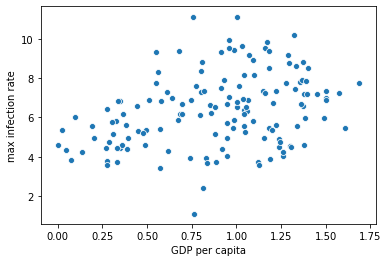

In [34]:
x = data2['GDP per capita']
y = data2['max infection rate']
sns.scatterplot(x,np.log(y))

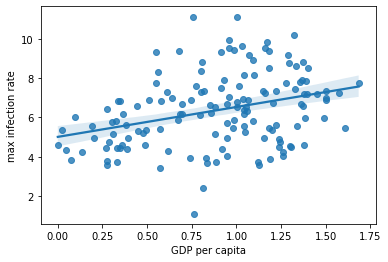

In [35]:
sns.regplot(x,np.log(y))

### Plotting Social support vs maximum Infection rate

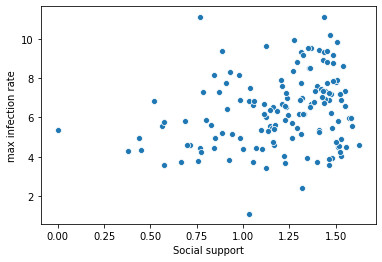

In [36]:
x = data2['Social support']
y = data2['max infection rate']
sns.scatterplot(x,np.log(y))

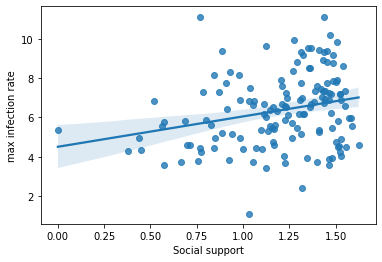

In [37]:
sns.regplot(x,np.log(y))

### Plotting Healthy life expectancy vs maximum Infection rate

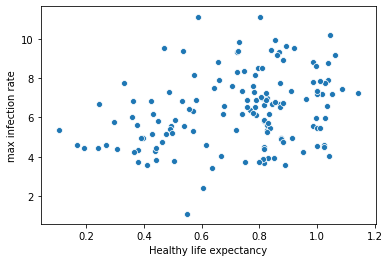

In [38]:
x = data2['Healthy life expectancy']
y = data2['max infection rate']
sns.scatterplot(x,np.log(y))

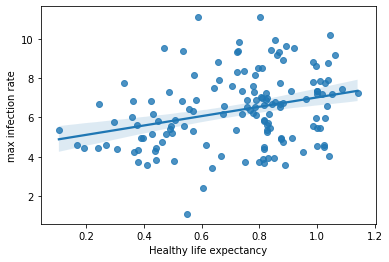

In [39]:
sns.regplot(x,np.log(y))

### Plotting Freedom to make life choices vs maximum Infection rate

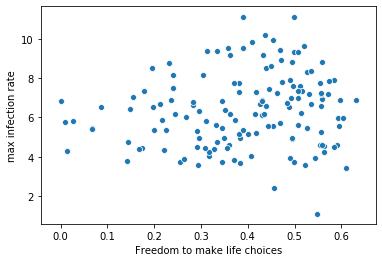

In [40]:
x = data2['Freedom to make life choices']
y = data2['max infection rate']
sns.scatterplot(x,np.log(y))

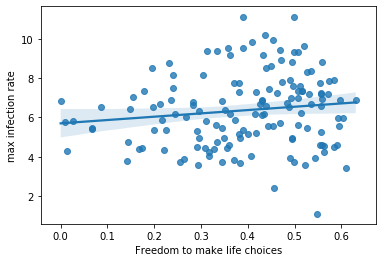

In [41]:
sns.regplot(x,np.log(y))

### Section 5 - Task 1 - Indicators having strong relationship with COVID19 Infection

From the Plot, we can observe that GDP Per Capita has a strong correleation with the Max Infection Rate.
This can be due to the fact that developed countries are being affected more by the infection. 
Also, it can be said we are coming to this conclusion because in Under Developed Countries the tests are not done properly.

Only when the tests are done properly in all countries would we know the real factors affecting the infection.